Flores Lara Alberto 6BV1

Clasificación para CIFAR usando CNN con Fine Turing

Librerias necesarias:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report
import time

Definir las funciones para crear la CNN con Fine Turing y para el entrenamiento y validación del modelo

In [2]:
# Función para construir CNN con Fine Tuning
def build_cnn_fine_tuning(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers[:-10]:  # Desbloqueamos las últimas 10 capas
        layer.trainable = True

    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    output_layer = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output_layer)
    return model

def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=64):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    end_time = time.time()

    # Evaluación
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred, target_names=[f'Clase {i}' for i in range(10)])
    print(report)
    print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

    return history, end_time - start_time

Cargar los datos de entrada

In [3]:
# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [4]:
model_cnn_ft = build_cnn_fine_tuning((32, 32, 3))
history_cnn_ft, time_cnn_ft = train_and_evaluate(model_cnn_ft, x_train, y_train_cat, x_test, y_test_cat, 10)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 649s 800ms/step - accuracy: 0.5455 - loss: 1.4335 - val_accuracy: 0.2832 - val_loss: 2.4147
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 585s 748ms/step - accuracy: 0.7495 - loss: 0.7576 - val_accuracy: 0.6023 - val_loss: 1.2793
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 581s 743ms/step - accuracy: 0.7888 - loss: 0.6328 - val_accuracy: 0.6523 - val_loss: 1.1084
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 585s 747ms/step - accuracy: 0.8185 - loss: 0.5446 - val_accuracy: 0.7476 - val_loss: 0.7840
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 596s 762ms/step - accuracy: 0.8485 - loss: 0.4561 - val_accuracy: 0.6719 - val_loss: 1.1397
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 633s 809ms/step - accuracy: 0.8652 - loss: 0.4044 - val_accuracy: 0.7132 - val_loss: 0.9518
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 604s 772ms/step - accuracy: 0.8881 - loss: 0.3317 - val_accuracy: 0.6621 - val_loss: 1.1852
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 601s 769ms/step - accuracy: 0.9052 -

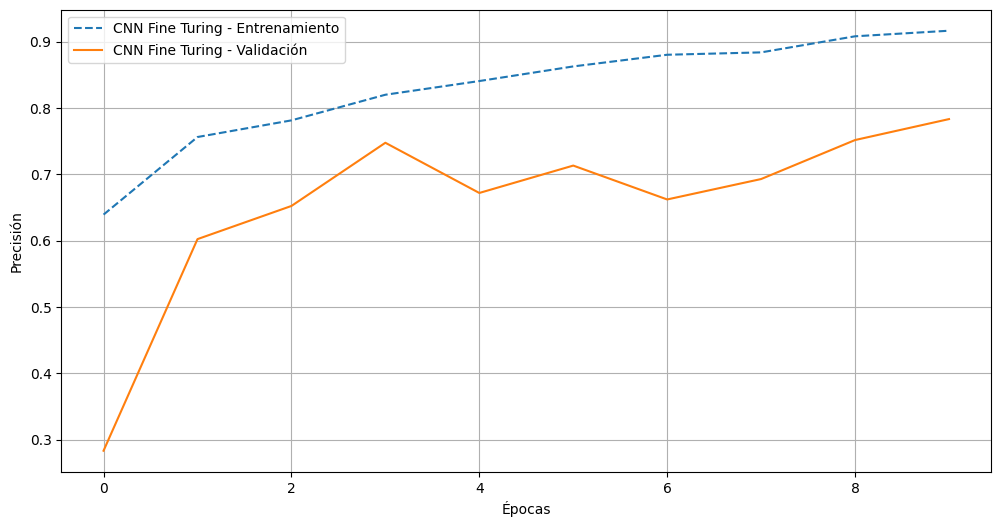

In [6]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_cnn_ft], ['CNN Fine Turing'])
